The goal of this analysis is to better understand the demographic makeup of Citibike riders, and to consider how basic demographic traits influnce Citibike usage behavior. I will focus my analysis on the age and gender of riders, and consider ride volume as well as average trip duration. From there, I will introduce basic weather data to consider how weather trends impact these metrics across demographic segments.  

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



rides = pd.read_csv('output3.csv')
weather = pd.read_csv('Weather.csv')
rides = rides[['Date', 'Duration', 'Birth Year', 'Gender']]
weather = weather.rename(columns={"DATE": "Date"})
weather = weather.drop(columns = ['Station'])
weather.head(3)


,Date,Average Wind Speed,Precipitation,Snowfall,Max Temperature
0,1/1/18,17.00,0.0,0.0,19
1,1/2/18,13.87,0.0,0.0,26
2,1/3/18,6.93,0.0,0.0,30


In [6]:
rides.head(3)

,Date,Duration,Birth Year,Gender
0,1/2/18,732,1969,1
1,1/3/18,520,1960,1
2,1/2/18,324,1947,1


In [7]:
ride_weather = rides.join(weather.set_index('Date'), on='Date')
ride_weather['Decade'] = ride_weather['Birth Year'].apply(lambda x: int(x / 10) * 10)

ride_weather.head()

,Date,Duration,Birth Year,Gender,Average Wind Speed,Precipitation,Snowfall,Max Temperature,Decade
0,1/2/18,732,1969,1,13.87,0.0,0.0,26,1960
1,1/3/18,520,1960,1,6.93,0.0,0.0,30,1960
2,1/2/18,324,1947,1,13.87,0.0,0.0,26,1940
3,1/3/18,562,1947,1,6.93,0.0,0.0,30,1940
4,1/1/18,1602,1968,1,17.00,0.0,0.0,19,1960


In [8]:
#Section 0 - Some initial data cleaning & basic analysis

#Let's de-codify the gender data so we can be sure they are clear, and then set them as strings

ride_weather['Gender'] = np.where(ride_weather['Gender'] == '1', 'male', ride_weather['Gender'])
ride_weather['Gender'] = np.where(ride_weather['Gender'] == '2', 'female', ride_weather['Gender'])



genderIndex = ride_weather[ ride_weather['Gender'] == '0' ].index
ride_weather = ride_weather.drop(genderIndex, axis=0)


ride_weather.astype({'Gender':'str'})
ridesPerGender = pd.DataFrame(ride_weather[['Gender', 'Duration']].groupby('Gender').count()) #simply using duration as a placeholder for count!

ridesPerGender = ridesPerGender.rename(columns={"Duration": "Count"})

/usr/local/lib/python3.6/dist-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


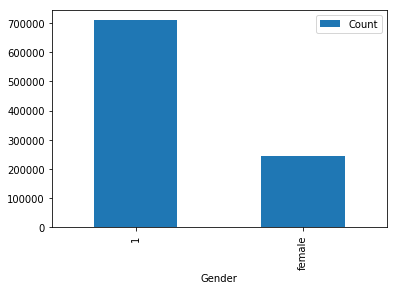

In [9]:
#Let's ~~~visualize~~~

ridesPerGender.plot(kind='bar')

#Woah! Way more Citibike rides are taken by males than females. 

In [10]:
#What happens if we look at ride duration?

ride_weather.groupby('Gender')['Duration'].agg(['mean', 'min', 'max'])

# We find out that Citibike a) has a minimum of 61 seconds per ride (???) and also doesn't remove data on rides that result in stolen bikes. 

,mean,min,max
Gender,,,
1,832.185940,61,3553060
female,1026.653558,61,5090114


In [11]:
# That more or less prevents me from taking any aggrigate data seriously, so I'm going to stick with median as my baseline measure

ride_weather.groupby('Gender')['Duration'].agg(['median'])

,median
Gender,
1,550
female,660


In [12]:
#And now some age analysis!
#First off, let's make sure we're working with integers for birth years. 

ride_weather['Birth Year'] = ride_weather['Birth Year'].astype(int)
rides.dtypes

Date          object
Duration       int64
Birth Year     int64
Gender         int64
dtype: object

In [13]:
#Now let's see what our distribution and range look like


ride_weather[['Birth Year', 'Duration']].groupby('Birth Year').count().shape


(99, 1)

In [14]:
#99 rows?? That's a lot of different birth years. How old are these riders???

ride_weather[['Birth Year', 'Duration']].groupby('Birth Year').count().sort_values('Birth Year', ascending = True).head(25)

,Duration
Birth Year,
1886,13
1887,2
1888,17
1889,2
1890,2
1893,1
1894,22
1895,17
1899,15


In [15]:
#Clearly there are some Citibike trolls who think it is funny to mess with my data! I'm going to go ahead and say that anyone over 100 is not riding a citi bike. 
#I would cut it off at an even lower age, but just in case some 99-year olds are weaving through traffic I don't want to take that away from them.

#rides['Birth Year'] = np.where(rides['Birth Year'] < 1936, 0, rides['Birth Year'])

ridesIndex = ride_weather[ ride_weather['Birth Year'] < 1937 ].index
ride_weather = ride_weather.drop(ridesIndex, axis=0)

ridesPerDec = ride_weather.rename(columns={"Duration": "Count"})


ridesPerDec[['Birth Year', 'Count']].groupby('Birth Year').count().sort_values('Birth Year', ascending = True).head(5)

,Count
Birth Year,
1937,138
1938,114
1939,80
1940,276
1941,418


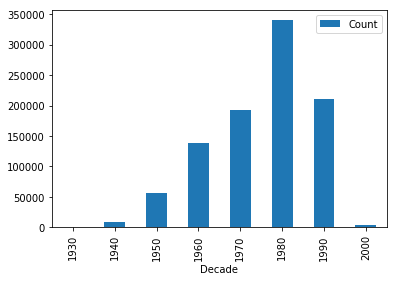

In [24]:
#So what does our age distribution look like?

ridesPerDec[['Decade', 'Count']].groupby('Decade').count().sort_values('Decade', ascending = True).plot(kind='bar')

In [25]:
ride_weather.head(3)

,Date,Duration,Birth Year,Gender,Average Wind Speed,Precipitation,Snowfall,Max Temperature,Decade
0,1/2/18,732,1969,1,13.87,0.0,0.0,26,1960
1,1/3/18,520,1960,1,6.93,0.0,0.0,30,1960
2,1/2/18,324,1947,1,13.87,0.0,0.0,26,1940


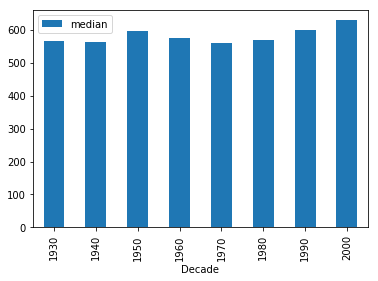

In [26]:
#Looking at median ride duration, it actually seems to be fairly uniform, with a slight uptick amongst Gen Z... 
#But all in all, your typical Citibike ride is goign to run around 10 minutes. Makes sense!

ride_weather[['Decade', 'Birth Year']]
age_ride_dur = ride_weather.groupby(['Decade']).agg(['median'])
age_ride_dur.plot(kind='bar', y='Duration')


Part 2 - Let's pull in some of our weather data. How will weather impact our demographic segments? Starting simple, let's just see what our data looks like for NYC in 2018.

In [28]:
high_temp = ride_weather['Date','Max Temperature']


KeyError: ignored